<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/Estadistica/analisis_exploratorio/como_hacer_un_EDA_p1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bins 
- La regla de la raiz cuadrada. Es una tecnica general para obtener el numero de bins a usar dentro de un histograma. 

In [ ]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=d07b4084ccc89a5cb813797e89a002103754422e9453ff35118594044395b932
  Stored in directory: /root/.cache/pip/wheels/be/4d/30/c131cf1cbb0046f14436cdd7a29f4cc8553d34754e3685d071
Successfully built empiricaldist


In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

iris.feature_names

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [ ]:
df.Species.value_counts()

0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

In [ ]:
df['Species'].replace(to_replace=0.0, 
                  value='setosa', inplace=True)
df['Species'].replace(to_replace=1.0, 
                  value='versicolor', inplace=True)
df['Species'].replace(to_replace=2.0, 
                  value='virginica', inplace=True)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
versicolor_petal_length = df[df['Species'] == 'versicolor']['petal length (cm)']

setosa_petal_length = df[df['Species'] == 'setosa']['petal length (cm)']

virginica_petal_length = df[df['Species'] == 'virginica']['petal length (cm)']

versicolor_petal_width = df[df['Species'] == 'versicolor']['petal width (cm)']

In [ ]:
virginica_petal_length

100    6.0
101    5.1
102    5.9
103    5.6
104    5.8
105    6.6
106    4.5
107    6.3
108    5.8
109    6.1
110    5.1
111    5.3
112    5.5
113    5.0
114    5.1
115    5.3
116    5.5
117    6.7
118    6.9
119    5.0
120    5.7
121    4.9
122    6.7
123    4.9
124    5.7
125    6.0
126    4.8
127    4.9
128    5.6
129    5.8
130    6.1
131    6.4
132    5.6
133    5.1
134    5.6
135    6.1
136    5.6
137    5.5
138    4.8
139    5.4
140    5.6
141    5.1
142    5.1
143    5.9
144    5.7
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), dtype: float64

Numero de bins con la regla de la raiz cuadrada :  7


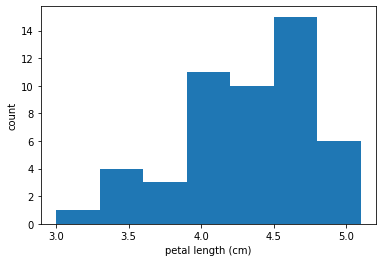

In [ ]:
import matplotlib.pyplot as plt 

# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
print('Numero de bins con la regla de la raiz cuadrada : ', n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Bee Swam Plots 
- Informacion : https://seaborn.pydata.org/generated/seaborn.swarmplot.html


- Grafica de una swamplot :  
    - En el eje x: Las variables discretas(las especies de iris)
    - En el eje y: el largo del petalo cm 

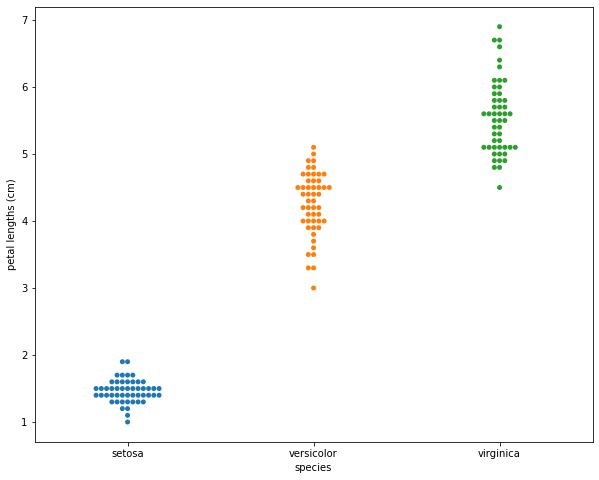

In [ ]:
# Create bee swarm plot with Seaborn's default settings
import seaborn as sns
plt.figure(figsize = (10,8))
sns.swarmplot(x = 'Species', y = 'petal length (cm)', data = df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal lengths (cm)')

# Show the plot
plt.show()

- El genero virginica tiende a tener unos petalos mas largos de las tres especies, mientras setosa los mas chicos. 

## ECDF (Empirical Cumulative Distribution Function)

Funcion empirica 
. Informacion : https://hmn.wiki/es/Statistical_distribution#:~:text=En%20estad%C3%ADstica%20%2C%20una%20funci%C3%B3n%20de,medida%20emp%C3%ADrica%20de%20una%20muestra%20.


In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x) + 1) / n

    return x, y

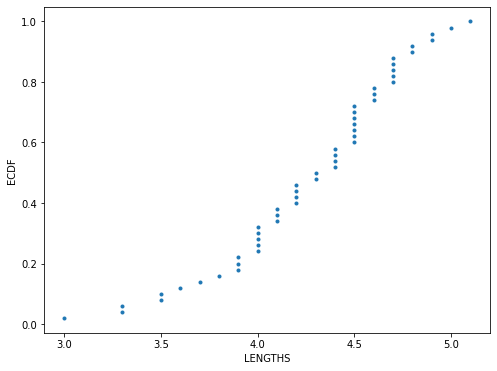

In [ ]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.figure(figsize =(8,6))
plt.plot(x_vers, y_vers, marker ='.', linestyle = 'none')

# Label the axes
_ = plt.ylabel('ECDF')
_ = plt.xlabel('LENGTHS')


# Display the plot

plt.show()


- Versicolor tiene una variabilidad bastante amplia en el largo de sus petalos 

- ECDF de las 3 especies

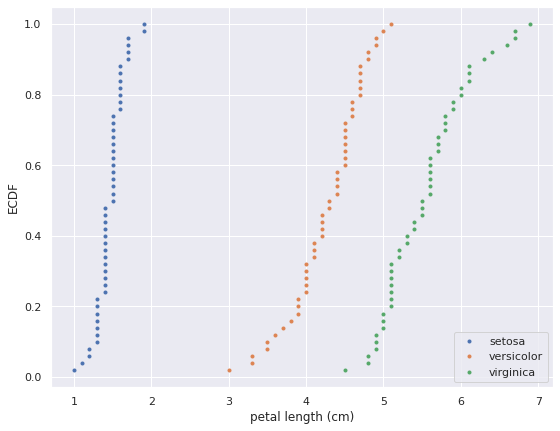

In [ ]:
# Compute ECDFs

x_set, y_set = ecdf(setosa_petal_length)

x_vers, y_vers = ecdf(versicolor_petal_length)

x_virg, y_virg =  ecdf(virginica_petal_length)



# Plot all ECDFs on the same plot
sns.set()
plt.figure(figsize = (9,7))
plt.plot(x_set, y_set, marker ='.', linestyle = 'none')
plt.plot(x_vers, y_vers, marker ='.', linestyle = 'none')
plt.plot(x_virg, y_virg, marker ='.', linestyle = 'none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Media 

- Valor promedio de un conjunto de datos

In [ ]:
# Compute the mean: mean_length_vers
mean_length_vers =  np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Percentiles
- Esta medida de posición no central aporta información sobre el porcentaje de observaciones de una variable, ordenados de menor a mayor, que se sitúan por debajo del valor de este.

In [ ]:
# Specify array of percentiles: percentiles
percentiles =np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## comparando ECDF VS Percentiles

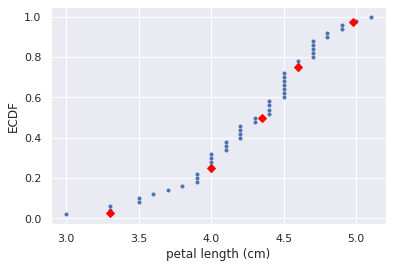

In [ ]:
# Plot the ECDF
sns.set()
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

## Box plot 

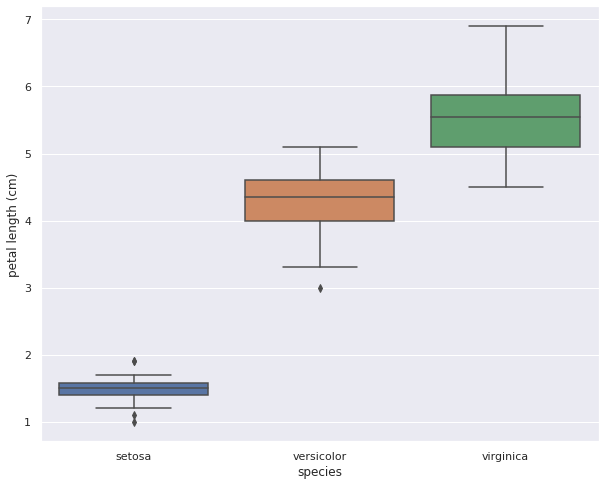

In [ ]:
# Create box plot with Seaborn's default settings
plt.figure(figsize = (10,8))
sns.set()
sns.boxplot(x = 'Species', y = 'petal length (cm)', data = df )

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

## Varianza
- La varianza es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media.

## Desviacion estandar
- La desviación estándar es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. 

In [ ]:
# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)
print('Varianza  : \t{:.3f}'.format( variance_np))

desv_np = np.std(versicolor_petal_length)
print('Desviación est.  : \t{:.3f}'.format( desv_np))

Varianza  : 	0.216
Desviación est.  : 	0.465


## Scatterplot 
- Comparar dos propiedades y su relación 

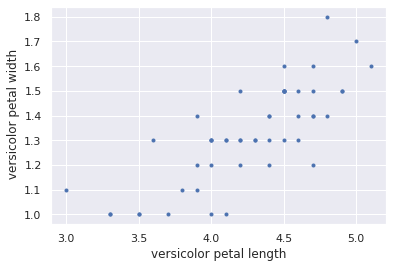

In [ ]:
# Make a scatter plot
sns.set()
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')


# Label the axes
_ = plt.xlabel('versicolor petal length')
_ = plt.ylabel(' versicolor petal width')


# Show the result
plt.show()

- Podemos ver una correlació  mientras mas largo sea el petalo, mas ancho sera. 

## Covarianza 
- La covarianza es el valor que refleja en qué cuantía dos variables aleatorias varían de forma conjunta respecto a sus medias.
- Nos permite saber cómo se comporta una variable en función de lo que hace otra variable. Es decir, cuando X sube ¿Cómo se comporta Y? 

### $Cov(X, Y)  = \frac{\sum_{i}(X_{i} - \bar{x} )(Y_{i} - \bar{y})}{n} $

<b> NOTA </b>
np.cov siempre arroja una matriz 2x2  donde (0,1) y (1,0) esta la covarianza y en (0,0) la varianza de x y (1,1) la varianza de y 

In [ ]:
# calculando covarianza entre el largo y el ancho del petalo 

# Compute the covariance matrix: covariance_matrix

covariance_matrix =  np.cov(versicolor_petal_length, versicolor_petal_width)
# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov

petal_cov = covariance_matrix[0,1]

# Print the length/width covariance

print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


# Probabilidad

- Estadistica inferencial: 
sirve para crear conclusiones atraves de la probabilidad sobre que podemos llegar a esperar si recolectamos los mismos tamaños de datos n veces. 

## Generando numeros aleatorios con np.random module 

- Ejercicio: generar numeros aleatorios entre 0 y 1 y graficarlo. si los  numeros son realmente aleatorios, todas las barras en el histograma deben ser similares

- numpy.random.random():
    - Genera un número aleatorio ya que no se especifica ningún tamaño para el conjunto de salida. El rango del número de salida generado se encuentra entre 0 y 1.Puedes obtener diferentes números aleatorios cuando ejecutas el mismo código varias veces. Para generar la salida constante, fijamos la seed de la función np.random().


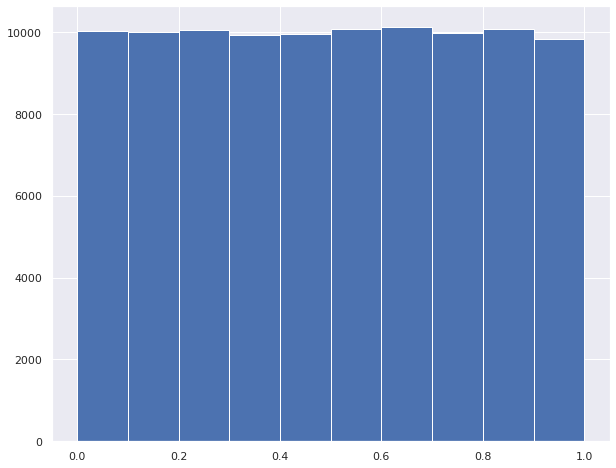

In [ ]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)
# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
sns.set()
plt.figure(figsize =(10,8))
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


### Experimento de bernoulli 
- Lanzamiento de moneda 

In [ ]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### Ejercicio. 
- Un banco concede 100 prestamos hipotecarios. Es posible que entre 0 y 100 de los prestamos sean impagados. Se sabe que la probabilidad de impago es de p = .05 

-  Para investigar esto, harás una simulación. Realizarás 100 ensayos Bernoulli utilizando la función perform_bernoulli_trials() que escribiste en el ejercicio anterior y registrarás cuántos incumplimientos obtenemos. Aquí, un éxito es un defecto. (Recuerde que la palabra "éxito" sólo significa que el ensayo Bernoulli se evalúa como Verdadero, es decir, ¿el destinatario del préstamo incumplió?) Se hará esto para otros 100 ensayos de Bernoulli. Y una y otra vez hasta que lo hayamos probado 1000 veces. A continuación, trazarás un histograma que describa la probabilidad del número de impagos.


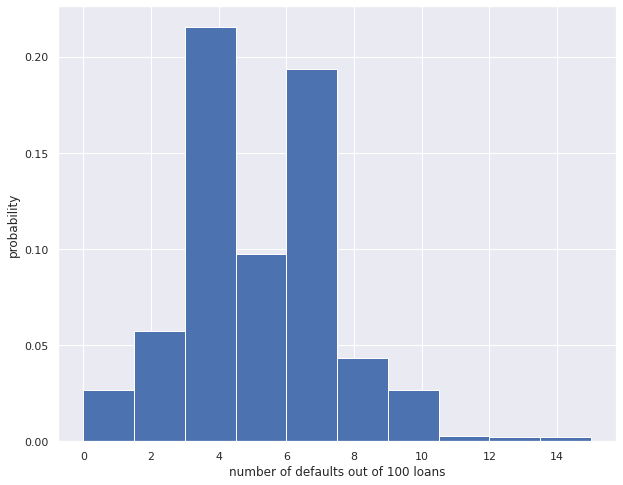

In [ ]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in  range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, .05)


# Plot the histogram with default number of bins; label your axes
sns.set()
plt.figure(figsize = (10,8))
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


<b> ¿Fracasara el banco? </b>

Un histograma como el usado anteriormente no nos dice mucho, para ello usaremos una ecdf

Si los tipos de interés son tales que el banco perderá dinero si 10 o más de sus préstamos son impagados, ¿cuál es la probabilidad de que el banco pierda dinero?

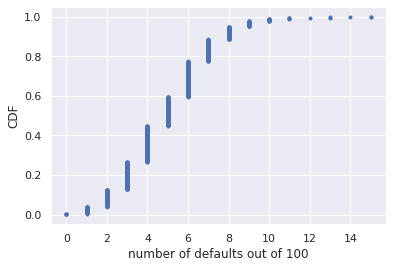

Probability of losing money = 0.022


In [ ]:
# Compute ECDF: x, y
x_a, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x_a, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

Como es de esperar, lo más probable es que se produzcan 5/100 impagos. 
quiere decir que dentro de un grupo de 100 prestamos hay una probabilidad del 60% de que 5 sean impagados o menos. 

Tambien tenemos un 2% de posibilidades de obtener 10 o más impagos de cada 100 préstamos.

In [ ]:
from empiricaldist import Cdf
age = x_a

cdf_age = Cdf.from_seq(age)

print(cdf_age[5])

0.595


### Hacemos lo mismo pero usando una distribución binomial y ahora con una muestra de 10000  y graficamos el cdf 

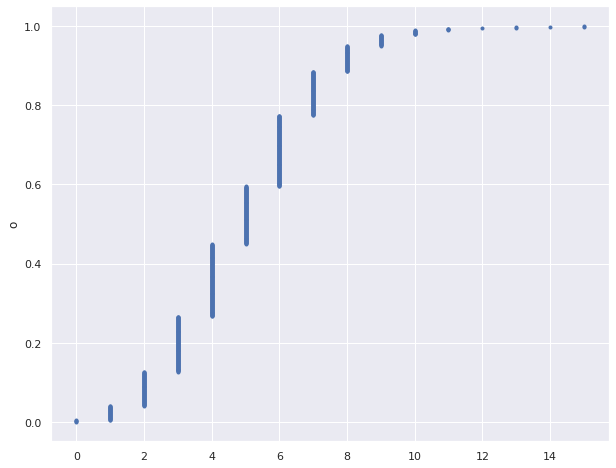

In [ ]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults_s = np.random.binomial(100, 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
sns.set()
plt.figure(figsize = (10,8))
plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('')
_ = plt.ylabel('o')

# Show the plot
plt.show()


### Graficando la PMF de la binomial 

- El truco consiste en configurar los bordes de los intervalos para pasarlos a plt.hist() mediante el argumento de la palabra clave bins. Queremos que los bins estén centrados en los enteros. Por lo tanto, los bordes de los intervalos deben ser -0,5, 0,5, 1,5, 2,5, ... hasta max(n_defaults) + 1,5 y luego restar .5 a la matriz

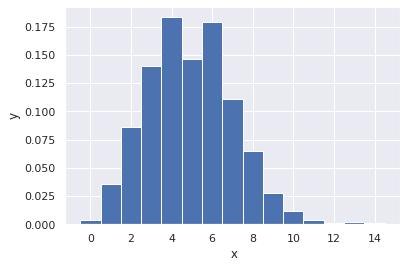

In [ ]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults_s) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density = True, bins = bins)

# Label axes
_ = plt.xlabel(' x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

## Poisson distribución 
- Una distribución de poisson es el limite de una distribución binomial para eventos atipicos 


- Ejercicio. 

en 1990 y en 2015 se produjeron la mayor cantidad de no-hitters de cualquier temporada de baseball (hubo 7). Dado que hay una media de 251/115 de no-hitters por temporada. 
¿Cual es la temporada de obtener 7 o mas en una temporada?


In [ ]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)
print(n_nohitters)
# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)
print(n_large)
# Compute probability of getting seven or more: p_large

p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters: \t{:.2f} % '.format((100 *p_large)))



[0 0 2 ... 2 3 2]
60
Probability of seven or more no-hitters: 	0.60 % 


## Distribución normal.
- https://www.matematicasonline.es/BachilleratoCCSS/segundo/archivos/distribucion_normal/DISTRIBUCION%20NORMAL.htm

### PDF (Probability Density Function)

<b> EJERCICIO </b>

- Extraiga 100.000 muestras de una distribución normal con una media de 20 y una desviación estándar de 1. Haga lo mismo con distribuciones normales con desviaciones estándar de 3 y 10, cada una de ellas con una media de 20. Asigna los resultados a samples_std1, samples_std3 y samples_std10, respectivamente.

- Trace un histograma de cada una de las muestras; para cada una, utilice 100 intervalos, utilizando también los argumentos de palabra clave normed=True e histtype='step'. El último argumento de palabra clave hace que el gráfico se parezca mucho a la PDF teórica suave. Necesitará hacer 3 llamadas a plt.hist().



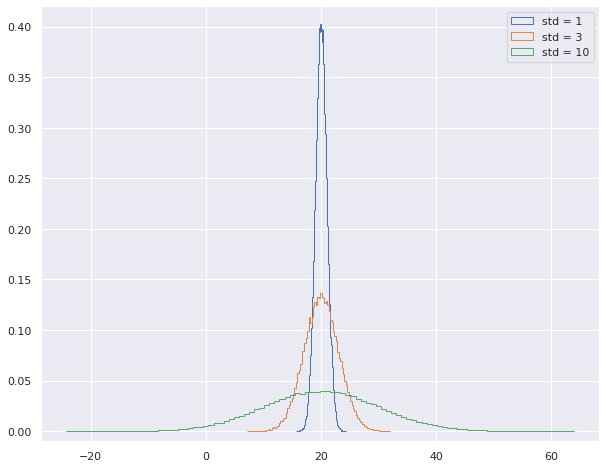

In [ ]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
sns.set()
plt.figure(figsize = (10,8))
_ = plt.hist(samples_std1, bins = 100, density = True, histtype = 'step')
_ = plt.hist(samples_std3, bins = 100, density = True, histtype = 'step') 
_ = plt.hist(samples_std10, bins = 100, density = True, histtype = 'step')


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


- La desviación es una medida de disperción de datos. 
- que tan lejos se encuentran de la media 
- mientras mas alta sea la desv. el pico se reduce

### CDF de una normal 

- Graficamos los CDFs de las anteriores distribuciónes 

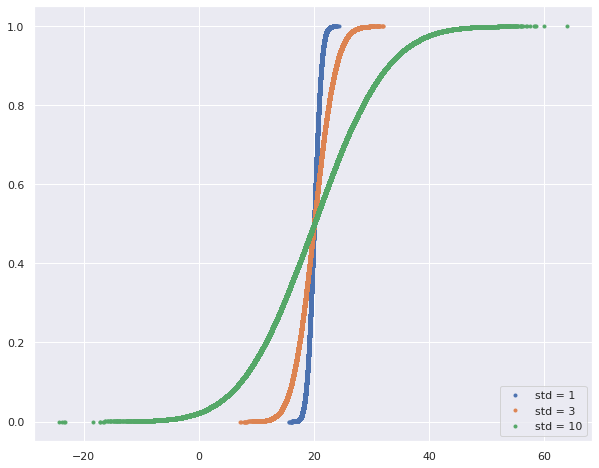

In [ ]:
# Generate CDFs

x_std1, y_std1  = ecdf(samples_std1)
x_std3, y_std3  = ecdf(samples_std3)
x_std10, y_std10  = ecdf(samples_std10)

# Plot CDFs
sns.set()
plt.figure(figsize = (10,8))
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


<b> EJERCICIO </b>

- ¿Se distribuyen normalmente los resultados de los Belmont Stakes?

- Desde 1926, los Belmont Stakes son una carrera de 1,5 millas de caballos purasangre de 3 años. Secretariat corrió el Belmont Stakes más rápido de la historia en 1973. Mientras que ese fue el año más rápido, 1970 fue el más lento debido a unas condiciones inusualmente húmedas y descuidadas. 
- Una vez eliminados estos dos valores atípicos del conjunto de datos, calcula la media y la desviación estándar de los tiempos de los ganadores del Belmont. Tome una muestra de una distribución normal con esta media y desviación estándar utilizando la función np.random.normal() y trace una CDF. Superponga la ECDF de los tiempos de los ganadores del Belmont. ¿Están cerca de la distribución normal?

In [82]:
belmont_no_outliers = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]

np.array(belmont_no_outliers)       

array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

[148.51, 146.65, 148.52, 150.7, 150.42, 150.88, 151.57, 147.54, 149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1, 147.2, 146.0, 146.4, 148.2, 149.8, 147.0, 147.2, 147.8, 148.2, 149.0, 149.8, 148.6, 146.8, 149.6, 149.0, 148.2, 149.2, 148.0, 150.4, 148.8, 147.2, 148.8, 149.6, 148.4, 148.4, 150.2, 148.8, 149.2, 149.2, 148.4, 150.2, 146.6, 149.8, 149.0, 150.8, 148.6, 150.2, 149.0, 148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2, 149.2, 151.0, 149.6, 149.6, 149.4, 148.6, 150.0, 150.6, 149.2, 152.6, 152.8, 149.6, 151.6, 152.8, 153.2, 152.4, 152.2]


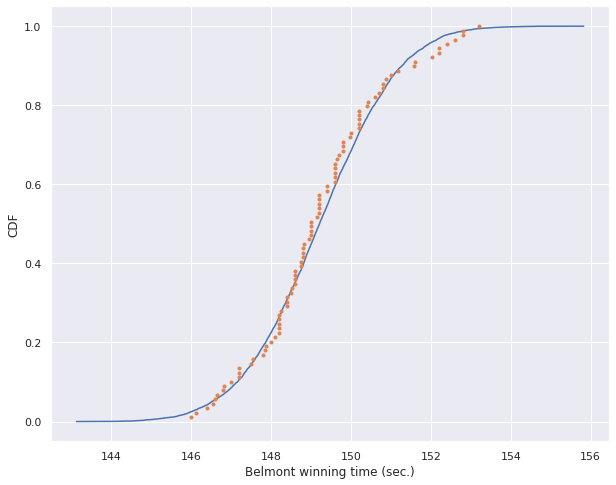

In [85]:
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
print(belmont_no_outliers)
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
sns.set()
plt.figure(figsize = (10,8))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


La CDF teórica y la ECDF de los datos sugieren que los tiempos de los ganadores de Belmont están, efectivamente, distribuidos normalmente

### ¿Qué posibilidades hay de que un caballo iguale o supere el récord de Secretariat?

In [84]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000634


## Distribución exponencial 

- https://support.minitab.com/es-mx/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/distributions/exponential-distribution/

- https://www.uv.es/ceaces/base/modelos%20de%20probabilidad/exponencial.htm

<b> EJERCICIO <b/>

- si tienes una historia, ¡puedes simularla!
A veces, la historia que describe nuestra distribución de probabilidad no tiene una distribución con nombre que la acompañe. En estos casos, ¡no temas! Siempre puedes simularla. Lo haremos en este y en el siguiente ejercicio.

- En los ejercicios anteriores, vimos el raro acontecimiento de los no-hitters en las Grandes Ligas de Béisbol. El bateo del ciclo, cuando un bateador consigue los cuatro tipos de hits en un solo juego, es otro evento raro del béisbol. Al igual que los no-hitters, esto puede modelarse como un proceso de Poisson, por lo que el tiempo entre los hits del ciclo también se distribuye exponencialmente.

- ¿Cuánto tiempo hay que esperar para ver un no-hitter y luego que un bateador logre el ciclo? La idea es que tenemos que esperar algún tiempo para el no-hitter, y luego después del no-hitter, tenemos que esperar para golpear el ciclo. Dicho de otro modo, ¿cuál es el tiempo total de espera para la llegada de dos procesos de Poisson diferentes en sucesión? El tiempo total de espera es el tiempo que se espera para el no-hitter, más el tiempo que se espera para el hitting the cycle.

- Ahora, escribirás una función para muestrear de la distribución descrita por esta historia.



In [86]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Distribución de no-hitters y ciclos
Ahora, utilizarás tu función de muestreo para calcular el tiempo de espera para observar un no-hitter y un bateo del ciclo. El tiempo medio de espera para un no-hitter es de 764 juegos, y el tiempo medio de espera para el bateo del ciclo es de 715 juegos.

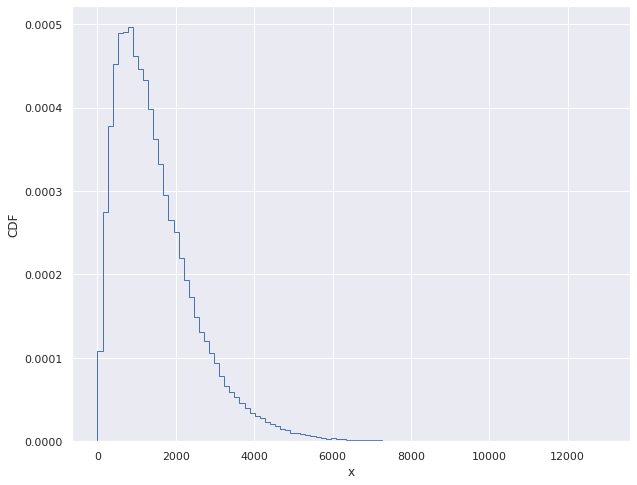

In [89]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
sns.set()
plt.figure(figsize = (10,8))
_ = plt.hist(waiting_times, bins = 100, density = True, histtype = 'step')


# Label axes

_ = plt.xlabel('x')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()


 Fíjate en que la PDF tiene un pico, a diferencia del tiempo de espera de un proceso de Poisson simple.

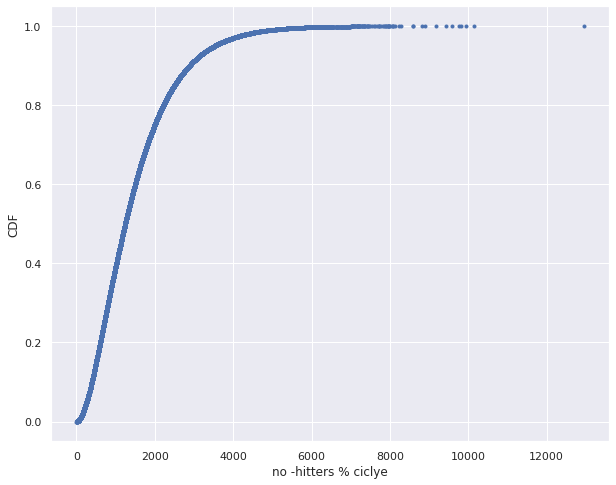

In [91]:
x, y = ecdf(waiting_times)

# Plot the CDFs and show the plot
sns.set()
plt.figure(figsize = (10,8))
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('no -hitters % ciclye')
_ = plt.ylabel('CDF')
plt.show()
